In [2]:
import numpy as np
import tensorflow as tf

# %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors 

import ipysh

%aimport models.base

import Hunch_utils  as Htls
import Hunch_lsplot as Hplt
import Hunch_tSNEplot as Hsne

%aimport models.AEFIT4
%aimport models.AEFIT5
%aimport models.Compose

# ipysh.Bootstrap_support.debug()

In [3]:
import Dummy_g1data as dummy
du1 = dummy.Dummy_g1data(counts=40000, size=15).buffer()
du2 = dummy.Dummy_g1data(counts=40000, size=20)

In [44]:
m1 = models.AEFIT5.AEFIT5(latent_dim=30, feature_dim=30,  dprate=0., scale=1, beta=0., name='m1', geometry=[1])
m2 = models.AEFIT5.AEFIT5(latent_dim=30, feature_dim=30,  dprate=0., scale=1, beta=0., name='m2', geometry=[1])
hm = models.AEFIT5.AEFIT5(latent_dim=10, feature_dim=60, beta=0., name='hidden', scale=2) #, geometry=[20,20,10,10])

AEFIT5 ready:
AEFIT5 ready:
AEFIT5 ready:


In [ ]:
d = du1.ds_array.batch(100).map(lambda x,y: (x,x) )
m1.fit(d, epochs=1)

In [ ]:
d = du1.ds_array.batch(100).map(lambda x,y: (x,x) )
m2.fit(d, epochs=1)

In [45]:
h2 = models.Compose.Compose().set_model(hm).compose([m1,m2])
h2._model.bypass = False
m1.trainable = True
m2.trainable = True
hm.trainable = True
h2.compile()

[(None, 30), (None, 30)]


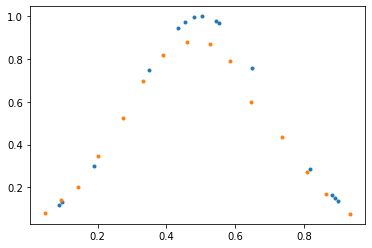

In [103]:
# [ v.name for v in h2.trainable_variables ]
def plot(d):
    plt.figure('data')
    x,y = tf.split(d[0][0][0], num_or_size_splits=2)
    plt.plot(x,y,'.')
d = du1.ds_array.shuffle(100).batch(2).map( lambda x,y: ((x,x),(x,x)) )
d0 = [x for x in d.take(1)][0]
y0 = tf.sigmoid(h2(d0, training=False))
plot(d0)
plot(y0)
# d0

In [47]:
d = du1.ds_array.batch(100).map(lambda x,y: ((x,x),(x,x)) )
h2.fit(d, epochs=3)

Epoch 1/3
400/400 [==============================] - 95s 238ms/step - loss: 32.5288 - output_1_loss: 19.2566 - output_2_loss: 18.8356
Epoch 2/3
400/400 [==============================] - 87s 217ms/step - loss: 29.4558 - output_1_loss: 14.8789 - output_2_loss: 14.8880
Epoch 3/3
400/400 [==============================] - 87s 217ms/step - loss: 28.4651 - output_1_loss: 14.4749 - output_2_loss: 14.4740


In [ ]:
p = Hplt.LSPlotBokeh()
p.set_model(m1)
p.set_data(du1, counts=1000)
p.plot(notebook_url='http://172.17.0.2:8888')

In [ ]:
hm = models.AEFIT5.AEFIT5(latent_dim=2, feature_dim=20, beta=0.)
m1 = models.AEFIT5.AEFIT5(latent_dim=10, feature_dim=30,  dprate=0., scale=1, beta=0.)
m2 = models.AEFIT5.AEFIT5(latent_dim=10, feature_dim=40,  dprate=0., scale=1, beta=0.)

In [ ]:
h = models.Compose.Compose().set_model(hm).compose([m1,m2])

In [ ]:
def get_tf_dataset(ds1, ds2):
    types = (tf.float32, tf.int32), (tf.float32, tf.int32)
    shape = ((2*ds1.dim,),()),((2*ds2.dim,),())
    def gen():
        import itertools
        for i in itertools.count(0):
            if i < min(len(ds1),len(ds2)):
                s1,l1 = ds1.gen_pt(i)
                s2,l2 = ds2.gen_pt(i)
                yield (np.concatenate([s1[:,0], s1[:,1]]), l1), (np.concatenate([s2[:,0], s2[:,1]]), l2)
            else:
                return
    return tf.data.Dataset.from_generator(gen, types, shape)

                       
ds = get_tf_dataset(du1,du2)
ds = ds.batch(100).map(lambda x,y: ((x[0],y[0]),(x[0],y[0])) )
ds

# h.fit(d, epochs=5)

In [ ]:
h.fit(ds, epochs=5)

In [ ]:
#
